In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('задание3.csv')
data.timestamp = pd.to_datetime(data.timestamp)
data.event_time = pd.to_datetime(data.event_time)

Насколько заранее пользователь в среднем покупает билеты на событие?

In [5]:
filtered_data = data[data.event_time > data.timestamp] #Событие должно произойти после покупки, а не наоборот

In [6]:
data['days_before_event'] = (filtered_data.event_time - filtered_data.timestamp).dt.days
avg_days_before_event = data.groupby('user_id').days_before_event.mean()

Наиболее вероятный город пользователя(больше всего транзакций)

In [8]:
most_common_city = data.groupby('user_id').city_title.agg(lambda x: x.mode()[0])

Самая популярная площадка пользователя (на какой площадке чаще покупал)

In [10]:
most_common_stage = data.groupby('user_id').stage_id.agg(lambda x: x.mode()[0])

Самая популярная категория пользователя (билеты какой категории чаще покупал)

In [12]:
most_common_category = data.groupby('user_id').category.agg(lambda x: x.mode()[0])

Кол-во транзакций

In [14]:
transactions_count = data.groupby('user_id').transaction_id.count()

Дата первой покупки

In [16]:
first_purchase = data.groupby('user_id').timestamp.min()

Дата последней покупки

In [18]:
last_purchase = data.groupby('user_id').timestamp.max()

Медиана цены у пользователя (Сколько стоит одна его транзакция в среднем)

In [20]:
median_price = data.groupby('user_id').price.median()

Кол-во купленных билетов

In [22]:
tickets_count = data.groupby('user_id').tickets_count.sum()

Продолжительность жизни пользователя (сколько он был активным и покупал /дней/)

In [24]:
user_lifetime = (last_purchase - first_purchase).dt.days

Среднее кол-во билетов в одной транзакции

In [26]:
avg_tickets_per_transaction = data.groupby('user_id').tickets_count.mean()

Среднее время между транзакциями

In [28]:
def avg_time_between_transactions(user_data):
    return user_data.timestamp.diff().mean().days

avg_time_between_trans = data.groupby('user_id').apply(avg_time_between_transactions)

Кол-во дней без транзакции (за “сегодня” взять дату ‘2022-09-20 00:00:00’)

In [30]:
today = pd.to_datetime('2022-09-20 00:00:00')
days_without_transaction = (today - last_purchase).dt.days

Живой или не живой пользователь (живым считаем пользователя, который совершил хотя бы одну транзакцию за последние 1.5 года)

In [32]:
is_active = last_purchase > (today - pd.DateOffset(days=365.25 * 1.5))

Объединим полученные данные в один датафрейм и поместим его в CSV

In [34]:
final_data = pd.DataFrame({
    'avg_days_before_event': avg_days_before_event,
    'most_common_city': most_common_city,
    'most_common_stage': most_common_stage,
    'most_common_category': most_common_category,
    'transactions_count': transactions_count,
    'first_purchase': first_purchase,
    'last_purchase': last_purchase,
    'median_price': median_price,
    'tickets_count': tickets_count,
    'user_lifetime': user_lifetime,
    'avg_tickets_per_transaction': avg_tickets_per_transaction,
    'avg_time_between_trans': avg_time_between_trans,
    'days_without_transaction': days_without_transaction,
    'is_active': is_active
})

In [35]:
# Сохранение в CSV
final_data.to_csv('user_metrics.csv')

In [36]:
popular_categories = most_common_category.value_counts()
top_5_categories = popular_categories.head(5)

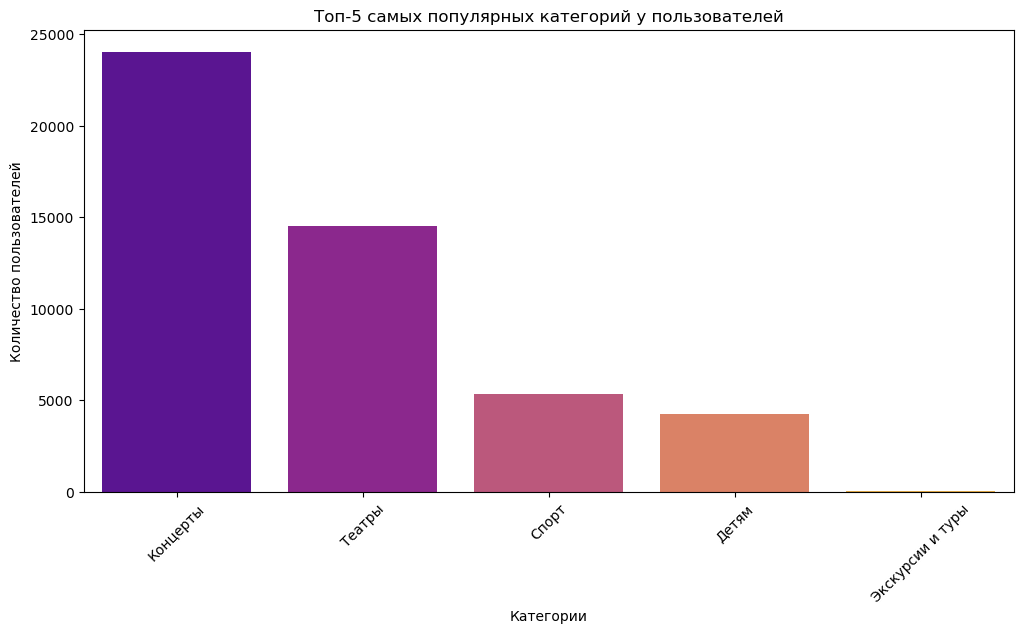

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="plasma")
plt.title('Топ-5 самых популярных категорий у пользователей')
plt.xlabel('Категории')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

In [38]:
popular_cities = most_common_city.value_counts()
top_5_cities = popular_cities.head(5)

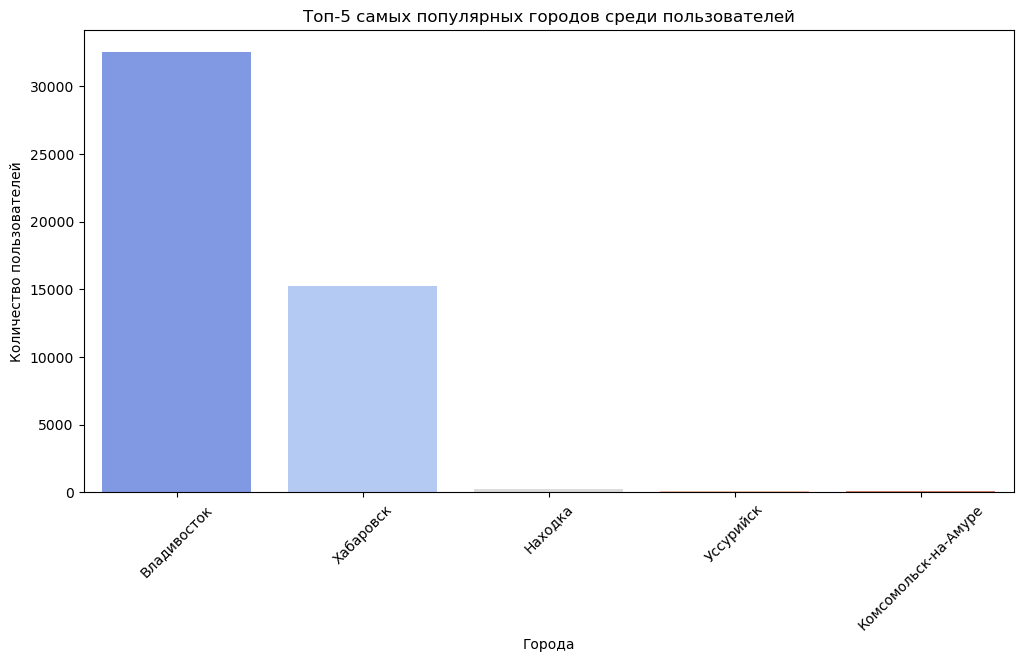

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette="coolwarm")
plt.title('Топ-5 самых популярных городов среди пользователей')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

In [40]:
popular_stages = most_common_stage.value_counts()
top_10_stages = popular_stages.head(10)

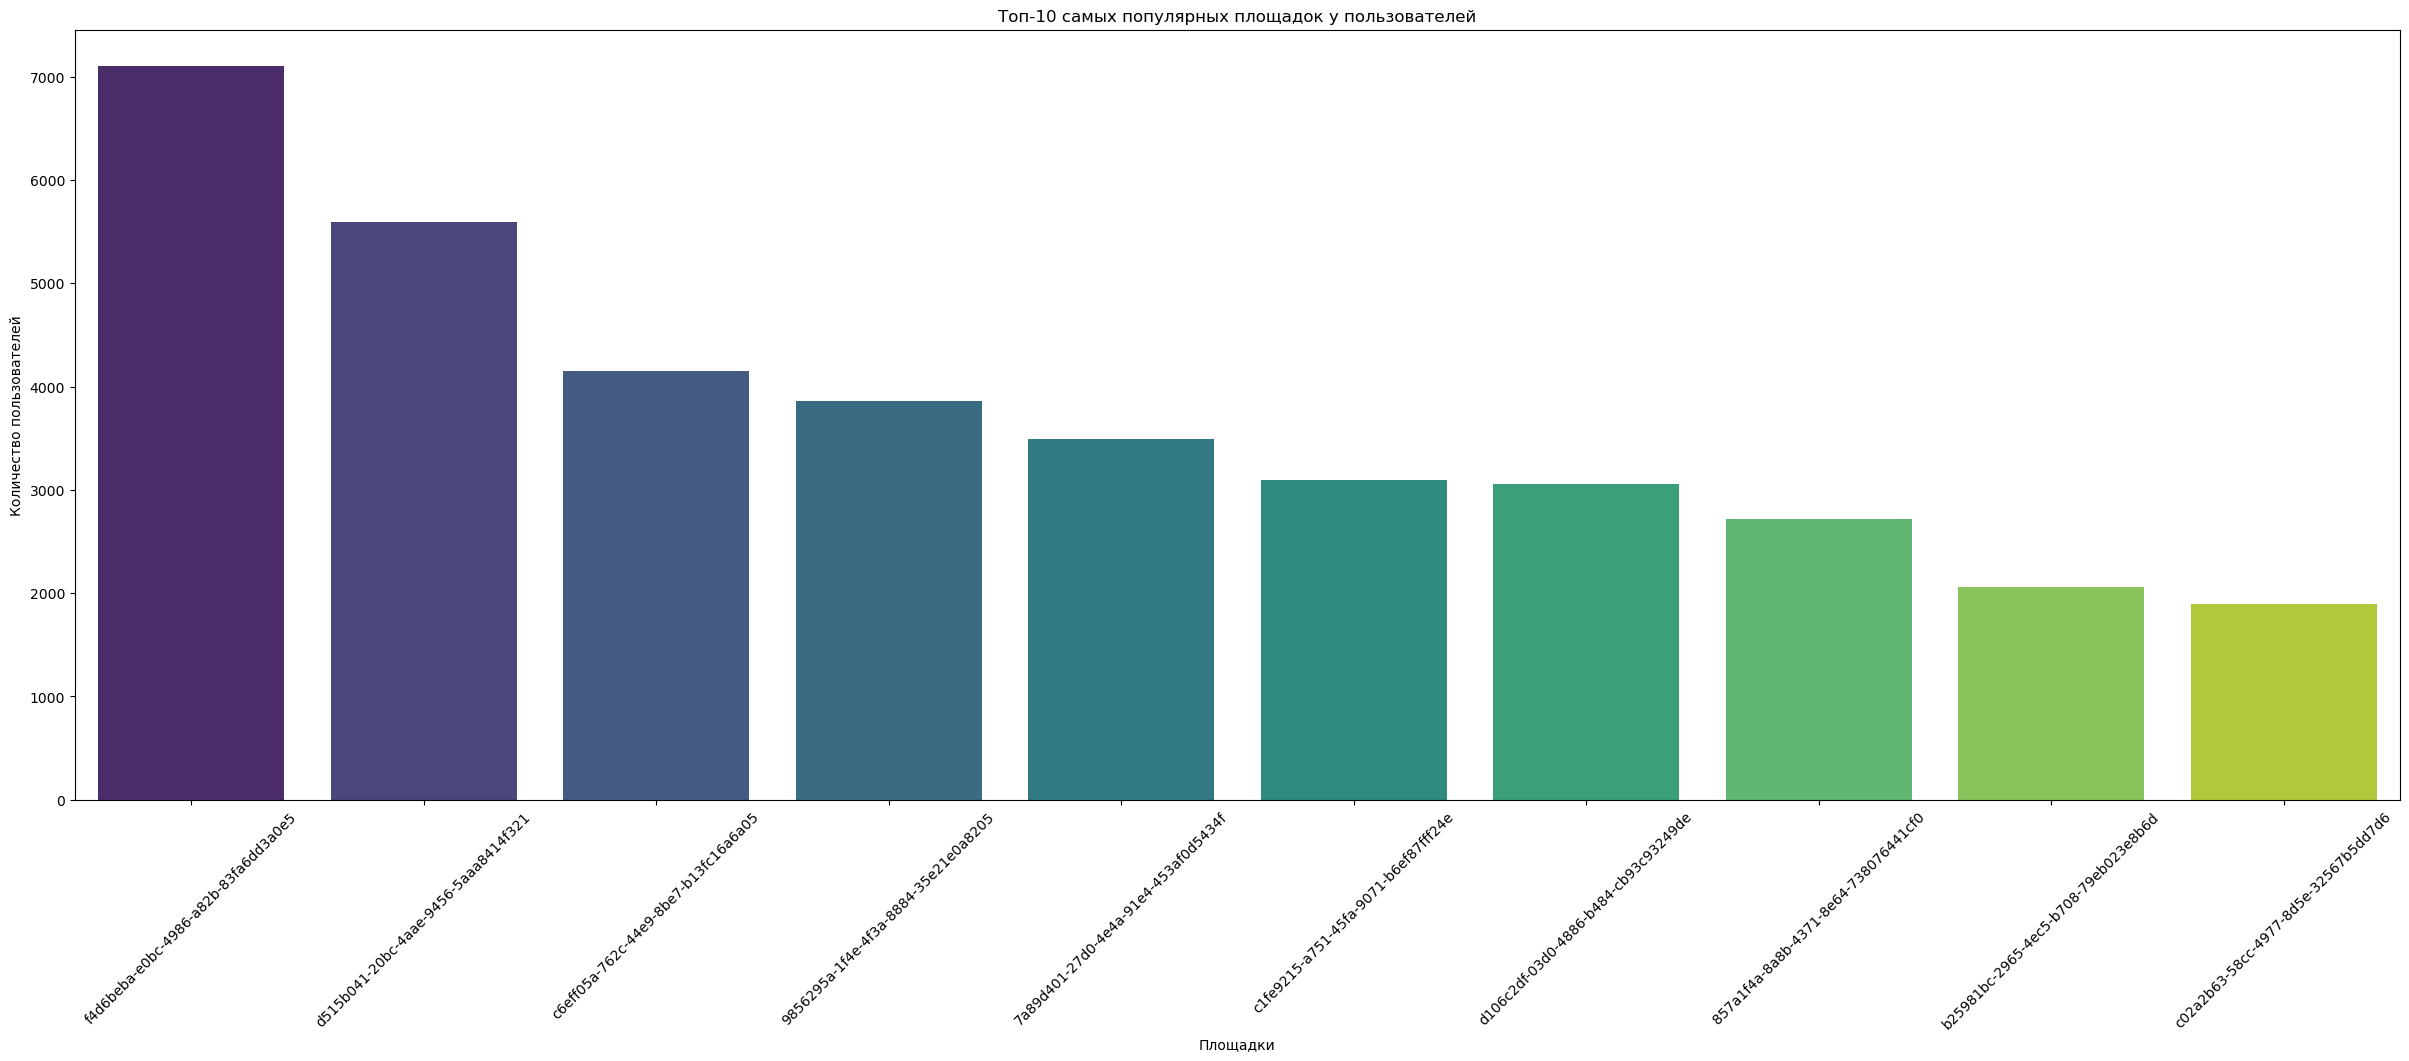

In [41]:
plt.figure(figsize=(30, 10))
sns.barplot(x=top_10_stages.index, y=top_10_stages.values, palette="viridis")
plt.title('Топ-10 самых популярных площадок у пользователей')
plt.xlabel('Площадки')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()